1. libreria y carga de datos


2. ajuste de las caracteristicas para la analitica.


3. analisis grafico de los de los delitos en bucaramanga.


4. Cada grafica lleva su analisis (conclusiones)

#SE CARGA LAS LIBRERIAS A USAR

In [ ]:
  #1 #TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np

#SISTEMA OPERATIVO
import os

#GRAFICO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#LEER ARCHIVOS DE WEB
import urllib

#MAPA DE CALOR

import plotly.express as px



Se conecta Drive con el google colab para poder aceder a los datos subidos en este

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Delitos proyecto/delitos_bucaramanga.csv')
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,DIA_NUM,RANGO_HORARIO,TIPOLOGÍA,LOCALIDAD,RANGO_HORARIO_ORDEN,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,17/06/2019,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,20:00-20:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,11. SUR,20,11,SUR,1,lunes,1
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,GRANJAS DE PROVENZA,12/09/2019,01:30:00 a. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,1:00-1:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,1,10,PROVENZA,1,jueves,4
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,07/04/2019,05:10:00 a. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,7,5:00-5:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,5,10,PROVENZA,1,domingo,7
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,30,23:00-23:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,11. SUR,23,11,SUR,1,miércoles,3
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,12/06/2019,02:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,14:00-14:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,14,10,PROVENZA,1,miércoles,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLA ROSA,29/05/2023,11:45:00 p. m.,43,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,29,23:00-23:59,DELITOS CONTRA LA FAMILIA,01. NORTE,23,1,NORTE,1,lunes,1
97565,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,SIN EMPLEO DE ARMAS,VILLA ROSA,05/06/2023,07:00:00 a. m.,47,FEMENINO,A PIE,A PIE,VIAS PUBLICAS,...,5,7:00-7:59,DELITOS CONTRA LA FAMILIA,01. NORTE,7,1,NORTE,1,lunes,1
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLAS DE SAN IGNACIO (SECTORES BAVARIA I Y II...,04/02/2023,06:30:00 a. m.,80,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,4,6:00-6:59,DELITOS CONTRA LA FAMILIA,01. NORTE,6,1,NORTE,1,sábado,6
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLAS DE SAN IGNACIO (SECTORES BAVARIA I Y II...,07/07/2023,07:12:00 a. m.,29,FEMENINO,A PIE,A PIE,VIAS PUBLICAS,...,7,7:00-7:59,DELITOS CONTRA LA FAMILIA,01. NORTE,7,1,NORTE,1,viernes,5


In [ ]:
dfbarrios=pd.read_csv('https://raw.githubusercontent.com/adiacla/bigdata/master/ubicacion_comuna.csv',encoding='utf-8')
dfbarrios

#Archivo compartido para poder sectorizar por latitud y longitud para poder graficar en el mapa

,Unnamed: 0,NOM_COM,Comuna,localizacion,loc
0,0,SUR,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
1,1,PROVENZA,"Comuna Provenza, Bucaramanga, Colombia","[7.08495522, -73.11476898]",NaN
2,2,LA CIUDADELA,"Comuna La ciudadela, Bucaramanga, Colombia","[7.10144615, -73.1252594]",NaN
3,3,LA CONCORDIA,"Comuna La concordia, Bucaramanga, Colombia","[7.10765362, -73.11735535]",NaN
4,4,CENTRO,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",NaN
5,5,CABECERA DEL LLANO,"Comuna Cabecera del llano, Bucaramanga, Colombia","[7.11298704, -73.10932922]",NaN
6,6,ORIENTAL,"Comuna Oriental, Bucaramanga, Colombia","[7.12733507, -73.11335754]",NaN
7,7,OCCIDENTAL,"Comuna Occidental, Bucaramanga, Colombia","[7.12566376, -73.14520264]",NaN
8,8,SAN FRANCISCO,"Comuna San francisco, Bucaramanga, Colombia","[7.1331625, -73.12514496]",NaN
9,9,NORORIENTAL,"Comuna Nororiental, Bucaramanga, Colombia","[7.1465044, -73.126091]",NaN


In [ ]:
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,DIA_NUM,RANGO_HORARIO,TIPOLOGÍA,LOCALIDAD,RANGO_HORARIO_ORDEN,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,17/06/2019,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,20:00-20:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,11. SUR,20,11,SUR,1,lunes,1
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,GRANJAS DE PROVENZA,12/09/2019,01:30:00 a. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,1:00-1:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,1,10,PROVENZA,1,jueves,4
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,07/04/2019,05:10:00 a. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,7,5:00-5:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,5,10,PROVENZA,1,domingo,7
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,30,23:00-23:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,11. SUR,23,11,SUR,1,miércoles,3
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,12/06/2019,02:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,14:00-14:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,10. PROVENZA,14,10,PROVENZA,1,miércoles,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLA ROSA,29/05/2023,11:45:00 p. m.,43,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,29,23:00-23:59,DELITOS CONTRA LA FAMILIA,01. NORTE,23,1,NORTE,1,lunes,1
97565,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,SIN EMPLEO DE ARMAS,VILLA ROSA,05/06/2023,07:00:00 a. m.,47,FEMENINO,A PIE,A PIE,VIAS PUBLICAS,...,5,7:00-7:59,DELITOS CONTRA LA FAMILIA,01. NORTE,7,1,NORTE,1,lunes,1
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLAS DE SAN IGNACIO (SECTORES BAVARIA I Y II...,04/02/2023,06:30:00 a. m.,80,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,4,6:00-6:59,DELITOS CONTRA LA FAMILIA,01. NORTE,6,1,NORTE,1,sábado,6
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,VILLAS DE SAN IGNACIO (SECTORES BAVARIA I Y II...,07/07/2023,07:12:00 a. m.,29,FEMENINO,A PIE,A PIE,VIAS PUBLICAS,...,7,7:00-7:59,DELITOS CONTRA LA FAMILIA,01. NORTE,7,1,NORTE,1,viernes,5


In [ ]:
#Se muestra la informacion de cada columna del data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97569 entries, 0 to 97568
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DESCRIPCION_CONDUCTA  97569 non-null  object
 1   ARMAS_MEDIOS          97569 non-null  object
 2   BARRIOS_HECHO         97569 non-null  object
 3   FECHA_HECHO           97569 non-null  object
 4   HORA_HECHO            97569 non-null  object
 5   EDAD                  95381 non-null  object
 6   GENERO                97569 non-null  object
 7   MOVIL_VICTIMA         97569 non-null  object
 8   MOVIL_AGRESOR         97569 non-null  object
 9   CLASE_SITIO           97569 non-null  object
 10  ARTICULO              97569 non-null  object
 11  DELITO_SOLO           97569 non-null  object
 12  CURSO_VIDA            97569 non-null  object
 13  CURSO_VIDA_ORDEN      97569 non-null  int64 
 14  AÑO_NUM               97569 non-null  int64 
 15  MES_NUM               97569 non-null

In [ ]:
# Se muestra cuantas veces se repite un barrio en el data frame para comprender la distribución de datos en la columna de BARRIOS_HECHOS
df.BARRIOS_HECHO.value_counts()


CENTRO                    8217
CABECERA DEL LLANO        4895
SAN FRANCISCO             4401
LA CONCORDIA              3461
SAN ALONSO                2548
                          ... 
LA ROSITA                    1
PRADOS DEL NORTE             1
ASENTAMIENTO LA HOYADA       1
CAMPO ALEGRE II              1
EL CONDADO                   1
Name: BARRIOS_HECHO, Length: 327, dtype: int64

In [ ]:
# Se busca las concidencias en los data frames df y dfbarrios (data frame donde esta la latitud y la longitud)
# para asi fusionarlas en una sola la cual es "NOM_COM"y asi que los dos data frames queden en solo uno
df = pd.merge(df, dfbarrios, on="NOM_COM")

df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,RANGO_HORARIO_ORDEN,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Unnamed: 0,Comuna,localizacion,loc
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,17/06/2019,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,20,11,SUR,1,lunes,1,0,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,23,11,SUR,1,miércoles,3,0,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,18,11,SUR,1,miércoles,3,0,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,25/08/2019,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,15,11,SUR,1,domingo,7,0,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,27/03/2019,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,23,11,SUR,1,miércoles,3,0,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,17/03/2023,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,19,19,CORREGIMIENTO 2,1,viernes,5,20,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",NaN
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,27/03/2023,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,19,CORREGIMIENTO 2,1,lunes,1,20,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",NaN
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,11/03/2023,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,22,19,CORREGIMIENTO 2,1,sábado,6,20,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",NaN
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,22/03/2023,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,8,19,CORREGIMIENTO 2,1,miércoles,3,20,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",NaN


In [ ]:
df.columns

Index(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'FECHA_HECHO',
       'HORA_HECHO', 'EDAD', 'GENERO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'LOCALIDAD', 'RANGO_HORARIO_ORDEN', 'NUM_COM', 'NOM_COM',
       'CANTIDAD_UNICA', 'DIA_NOMBRE', 'DIA_NOMBRE_ORDEN', 'Unnamed: 0',
       'Comuna', 'localizacion', 'loc'],
      dtype='object')

In [ ]:
# Se elimina 'Unnamed: 0' y 'loc' del DataFrame 'df'.
# El argumento 'axis=1' especifica que las columnas deben eliminarse en lugar de las filas.
# El argumento 'inplace=True' indica que la operación debe realizarse directamente en el DataFrame 'df'.
df.drop(['Unnamed: 0', 'loc'], axis=1, inplace=True)

In [ ]:
# Se crea una nueva columna llamada "FECHA COMPLETA" la cual es la combinacion entre "FECHA_HECHO" y "HORA_HECHO",
# colocando un espacion en blanco entre las dos para asi porder ternerlos es un solo formato
df['FECHA_COMPLETA'] = df["FECHA_HECHO"] + ' ' + df["HORA_HECHO"]

df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,LOCALIDAD,RANGO_HORARIO_ORDEN,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,localizacion,FECHA_COMPLETA
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,17/06/2019,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,20,11,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",17/06/2019 08:30:00 p. m.
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,23,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 11:15:00 p. m.
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,30/01/2019,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,18,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 06:00:00 p. m.
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,25/08/2019,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,15,11,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",25/08/2019 03:45:00 p. m.
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,27/03/2019,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,23,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",27/03/2019 11:00:00 p. m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,17/03/2023,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CORREGIMIENTO 2,19,19,CORREGIMIENTO 2,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",17/03/2023 07:22:00 p. m.
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,27/03/2023,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CORREGIMIENTO 2,17,19,CORREGIMIENTO 2,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",27/03/2023 05:25:00 p. m.
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,11/03/2023,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CORREGIMIENTO 2,22,19,CORREGIMIENTO 2,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",11/03/2023 10:50:00 p. m.
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,22/03/2023,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CORREGIMIENTO 2,8,19,CORREGIMIENTO 2,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",22/03/2023 08:00:00 a. m.


In [ ]:
#Se el tipo de dato de la columna "FECHA_HECHO" en datetime

df=df.astype({"FECHA_HECHO":"datetime64[ns]"})

<ipython-input-162-4baef1fd0192>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
#Se convierte la columna "FECHA_HECHO" en modo datatime, utilizando el metodo 'pd.to_datetime()'
#ademas se utiliza el argumento 'format="DD/MM/YYYY"' para especifircar el formato de la fecha original
#siendo este un dia con dos digitos , mes con dos digitos y el año con 4.

df["FECHA_HECHO"] = pd.to_datetime(df["FECHA_HECHO"], format="DD/MM/YYYY")


In [ ]:
#Se calcula la cantidad de delitos por año en la columna "FECHA_HECHO"
# y almacenando los resultados en un DataFrame llamado "cantidadaño"
#.groupby(df["FECHA_HECHO"].dt.year)["DESCRIPCION_CONDUCTA"].count() agrupan los datos en función del año
#y los cuenta, .to_frame() convierte la serie resultante en un DataFrame

cantidadaño=df.groupby(df["FECHA_HECHO"].dt.year)["DESCRIPCION_CONDUCTA"].count().to_frame()
cantidadaño


,DESCRIPCION_CONDUCTA
FECHA_HECHO,
2016,10770
2017,11004
2018,12479
2019,12892
2020,10363
2021,15369
2022,15750
2023,8942


In [ ]:
# Esta línea de código extrae el año de la columna 'FECHA_HECHO' en el DataFrame 'df'.
# Primero, utiliza el atributo 'dt' para acceder a las propiedades de fecha y hora de la columna.
# Luego, aplica 'year' para extraer el año de cada fecha en la columna.
# Finalmente, utiliza 'value_counts()' para contar la frecuencia de cada año en la columna 'FECHA_HECHO'.
#df["FECHA_HECHO"].dt.year.value_counts()

#Se deja comentada esta linea ya que analizando se vio que da la misma informacion que la linea anterior volviendola redundante

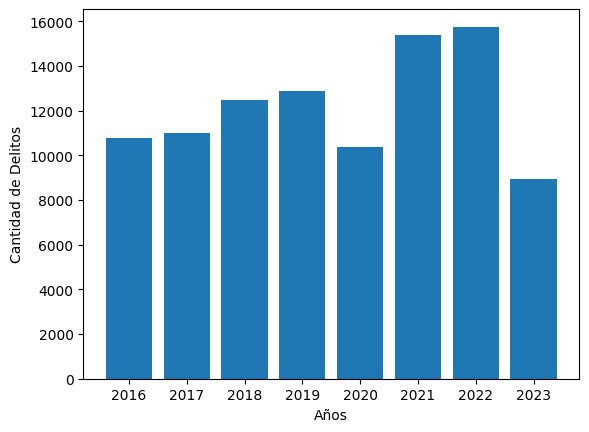

In [ ]:
#Se hace una grafica de barras a partir de los datos contenidos en "cantidadaño"
#para asi poder analisar mejor los datos y sacar conclusiones
fig,ax,=plt.subplots()
ax.bar(cantidadaño.index,cantidadaño["DESCRIPCION_CONDUCTA"])
ax.set_xlabel("Años")
ax.set_ylabel("Cantidad de Delitos")
plt.show()

#De la grafica sacamos las siguientes conclusiones:
#1. Los delitos tienden a aumentar a medida que pasan los años
#2. En el 2020 ocurrio una baja esto se concluse que ocurrio por la pandemia
#3. El año 2023 se ve tan bajo ya que los datos utilizados solo se toman hasta julio del 2023

In [ ]:
#Se calcula la cantidad de delitos por año y mes en la columna "FECHA_HECHO"
# y almacenando los resultados en un DataFrame llamado "cantidadmesxaño"
#groupby([df["FECHA_HECHO"].dt.year,df["FECHA_HECHO"].dt.month])["DESCRIPCION_CONDUCTA"].count()
# agrupan los datos en función del año y del mes ademas cuenta la cantidad de delitos
#.to_frame() convierte la serie resultante en un DataFrame

cantidadmesxaño=df.groupby([df["FECHA_HECHO"].dt.year,df["FECHA_HECHO"].dt.month])["DESCRIPCION_CONDUCTA"].count().to_frame()
cantidadmesxaño


DESCRIPCION_CONDUCTA
FECHA_HECHO FECHA_HECHO                      
2016        1                            1023
            2                             910
            3                             866
            4                             873
            5                             902
...                                       ...
2023        8                             244
            9                             258
            10                            326
            11                            329
            12                            266

[96 rows x 1 columns]

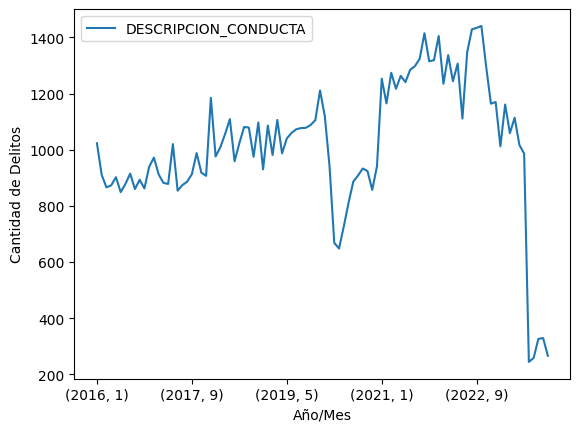

In [ ]:
#Se hace una grafica de lineas para asi poder visualizar mejor la cantidad de delitos atraves de los años
#teniendo en cuenta los meses que en los que se realizaron


ax = cantidadmesxaño.plot(kind="line")
ax.set_xlabel("Año/Mes")
ax.set_ylabel("Cantidad de Delitos")
plt.show()

In [ ]:
#Se filta el data frame "cantidadaño" para incluir solo los años hasta el 2022
#esto se hace ya la data solo toma hasta julio del 2023 por lo tanto es mejor no utilizar el 2023

cantidadxañosin2023=cantidadaño[cantidadaño.index<2023]
cantidadxañosin2023


,DESCRIPCION_CONDUCTA
FECHA_HECHO,
2016,10770
2017,11004
2018,12479
2019,12892
2020,10363
2021,15369
2022,15750


<Axes: xlabel='FECHA_HECHO', ylabel='DESCRIPCION_CONDUCTA'>

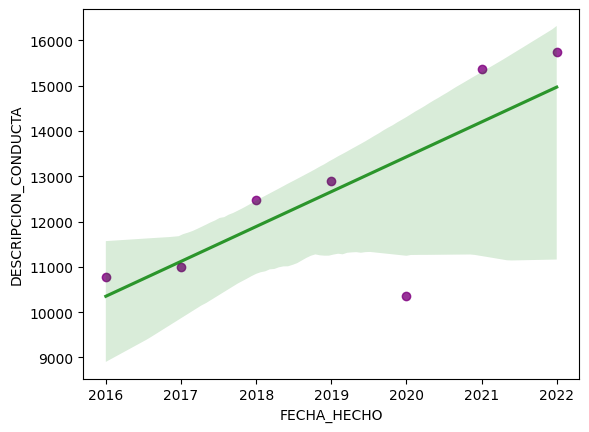

In [ ]:
#Se utiliza Seaborn para crear un gráfico de regresión para asi poder ver la tendencia que representa
#la linea verda y la cantidad de delitos por año se representa como puntos morados

sns.regplot(x=cantidadxañosin2023.index,y=cantidadxañosin2023["DESCRIPCION_CONDUCTA"],scatter_kws={"color":"purple", "alpha":0.8},line_kws={"color":"green","alpha":0.8})

In [ ]:
#Se calcula cuanto aparece cada barrio en los datos o
#cuantos delitos se presento en caba barrio
#esto se hace para poder ver los barrios con mayor y menor cantidad de delitos

frecuencias_barrios = df['BARRIOS_HECHO'].value_counts()
frecuencias_barrios

CENTRO                          8217
CABECERA DEL LLANO              4895
SAN FRANCISCO                   4401
LA CONCORDIA                    3461
SAN ALONSO                      2548
                                ... 
CAMPO ALEGRE II                    1
AUTOPISTA F/BLANCA-P/CUESTA.       1
EL CONDADO                         1
OMAGÁ 3                            1
TEJADOS                            1
Name: BARRIOS_HECHO, Length: 327, dtype: int64

In [ ]:
#Se hace los mismo que el paso anterior pero con las comunas

df['NOM_COM'].value_counts()


ORIENTAL              11395
SAN FRANCISCO         11210
CENTRO                10341
CABECERA DEL LLANO     9625
NORTE                  9085
LA CONCORDIA           6653
OCCIDENTAL             6513
GARCIA ROVIRA          5307
PROVENZA               4969
NORORIENTAL            3985
SUR                    3154
MUTIS                  2668
LA CIUDADELA           2388
MORRORICO              2351
LAGOS DEL CACIQUE      2345
SUROCCIDENTE           1905
LA PEDREGOSA           1880
SIN REGISTRO            769
CORREGIMIENTO 3         485
CORREGIMIENTO 1         376
CORREGIMIENTO 2         165
Name: NOM_COM, dtype: int64

In [ ]:
#Se obtiene un resumen estadistico de la edades
#para comprender la edad promedio, la dispersión
# y la variabilidad .

df.EDAD.describe()

count            95381
unique              98
top       SIN REGISTRO
freq              7493
Name: EDAD, dtype: object

In [ ]:
# reasignar el nombre de algunas comunas al valor "CENTRO".

# Diccionario que define los mapeos de nombres originales a los nuevos nombres.
# Las claves representan los nombres originales de las comunas que queremos reemplazar.
# Los valores son el nombre "CENTRO" al que queremos reasignar.

comuna={'SIN REGISTRO':'CENTRO','CORREGIMIENTO 3':'CENTRO','CORREGIMIENTO 2':'CENTRO','CORREGIMIENTO 1':'CENTRO'}

# Usamos el método replace de pandas para realizar el reemplazo de nombres.
# La opción regex=True nos permite hacer un reemplazo basado en expresiones regulares.
# El argumento inplace=True indica que queremos hacer el cambio directamente en el DataFrame original

df.NOM_COM.replace(comuna,regex=True,inplace=True)

In [ ]:
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,LOCALIDAD,RANGO_HORARIO_ORDEN,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,localizacion,FECHA_COMPLETA
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,20,11,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",17/06/2019 08:30:00 p. m.
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,23,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 11:15:00 p. m.
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,18,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 06:00:00 p. m.
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,15,11,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",25/08/2019 03:45:00 p. m.
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11. SUR,23,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",27/03/2019 11:00:00 p. m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CORREGIMIENTO 2,19,19,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",17/03/2023 07:22:00 p. m.
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CORREGIMIENTO 2,17,19,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",27/03/2023 05:25:00 p. m.
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CORREGIMIENTO 2,22,19,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",11/03/2023 10:50:00 p. m.
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CORREGIMIENTO 2,8,19,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",22/03/2023 08:00:00 a. m.


In [ ]:
# Divide la columna 'localizacion' del DataFrame df en dos nuevas columnas.
# La división se basa en el delimitador ','.
# El argumento expand=True indica que queremos dividir la cadena en varias columnas.
# Renombra las dos columnas resultantes a 'lat' y 'lon'.

df_localizacion=df.localizacion.str.split(',',expand=True)
df_localizacion=df_localizacion.rename(columns={0:'lat',1:'lon'})
df_localizacion=df_localizacion.replace('\[','',regex=True).replace(']','',regex=True).astype(float)


# Muestra los tipos de datos de las columnas del DataFrame df_localizacion.
df_localizacion.dtypes

lat    float64
lon    float64
dtype: object

In [ ]:
#concatear el df con las coordenadas
df=pd.concat([df,df_localizacion],axis=1)
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,localizacion,FECHA_COMPLETA,lat,lon
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",17/06/2019 08:30:00 p. m.,7.083413,-73.132530
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 11:15:00 p. m.,7.083413,-73.132530
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",30/01/2019 06:00:00 p. m.,7.083413,-73.132530
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",25/08/2019 03:45:00 p. m.,7.083413,-73.132530
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia","[7.08341312, -73.13253021]",27/03/2019 11:00:00 p. m.,7.083413,-73.132530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,19,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",17/03/2023 07:22:00 p. m.,7.118130,-73.126312
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,19,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",27/03/2023 05:25:00 p. m.,7.118130,-73.126312
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,19,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",11/03/2023 10:50:00 p. m.,7.118130,-73.126312
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,19,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia","[7.11813021, -73.12631226]",22/03/2023 08:00:00 a. m.,7.118130,-73.126312


In [ ]:

#Se eliminan las columnas de localizacion y localidad puesto que se vuelven irrelevantes debido a que anteriormente se crearon las columas de latitud y longitud

df.drop(['localizacion','LOCALIDAD'],axis=1,inplace=True)

In [ ]:
# Agrupa el DataFrame original, df, por 'NOM_COM', 'lat' y 'lon'.
# Luego, cuenta la cantidad de 'DESCRIPCION_CONDUCTA' para cada grupo,
# lo que proporciona la cantidad de delitos reportados para cada comuna y ubicación.
cantidadComuna = df.groupby(['NOM_COM', 'lat', 'lon'])['DESCRIPCION_CONDUCTA'].count().to_frame()

# Extrae el nombre de la comuna (NOM_COM), latitud (lat) y longitud (lon) desde el índice
# multindex y los asigna como columnas separadas.
cantidadComuna['NOM_COM'] = cantidadComuna.index.get_level_values(0)
cantidadComuna['lat'] = cantidadComuna.index.get_level_values(1)
cantidadComuna['lon'] = cantidadComuna.index.get_level_values(2)

# Restablece el índice del DataFrame para que el índice sea numérico
cantidadComuna = cantidadComuna.reset_index(drop=True)
cantidadComuna

,DESCRIPCION_CONDUCTA,NOM_COM,lat,lon
0,9625,CABECERA DEL LLANO,7.112987,-73.109329
1,12136,CENTRO,7.118130,-73.126312
2,5307,GARCIA ROVIRA,7.103792,-73.148537
3,2388,LA CIUDADELA,7.101446,-73.125259
4,6653,LA CONCORDIA,7.107654,-73.117355
5,1880,LA PEDREGOSA,7.095373,-73.108902
6,2345,LAGOS DEL CACIQUE,7.101407,-73.100105
7,2351,MORRORICO,7.133418,-73.104065
8,2668,MUTIS,7.093129,-73.134743
9,3985,NORORIENTAL,7.146504,-73.126091


In [ ]:
#Se muestra el mapa de densidad, respecto a las coordenadas y la cantidad de delitos por cada una de estas, esto ayuda a ver graficamente donde se han cometidos los delitos registrados en el archivo csv

fig = px.density_mapbox(cantidadComuna, lat = 'lat', lon = 'lon',z='DESCRIPCION_CONDUCTA',
                        radius = 50,
                        hover_name='NOM_COM',
                        color_continuous_scale='rainbow',
                        center = dict(lat = 7.12539, lon = -73.1198),
                        zoom = 12,
                        mapbox_style = 'open-street-map')
fig.show()

In [ ]:
#Se filta los barrios por la cantidad de delitos para quedarse solamente los que tienen mas de 1000 delitos
#esto se hace para poder centrarte en los barrios más comunes o significativos.

frecuencias_barrios_filtradas = frecuencias_barrios[frecuencias_barrios >= 1000]

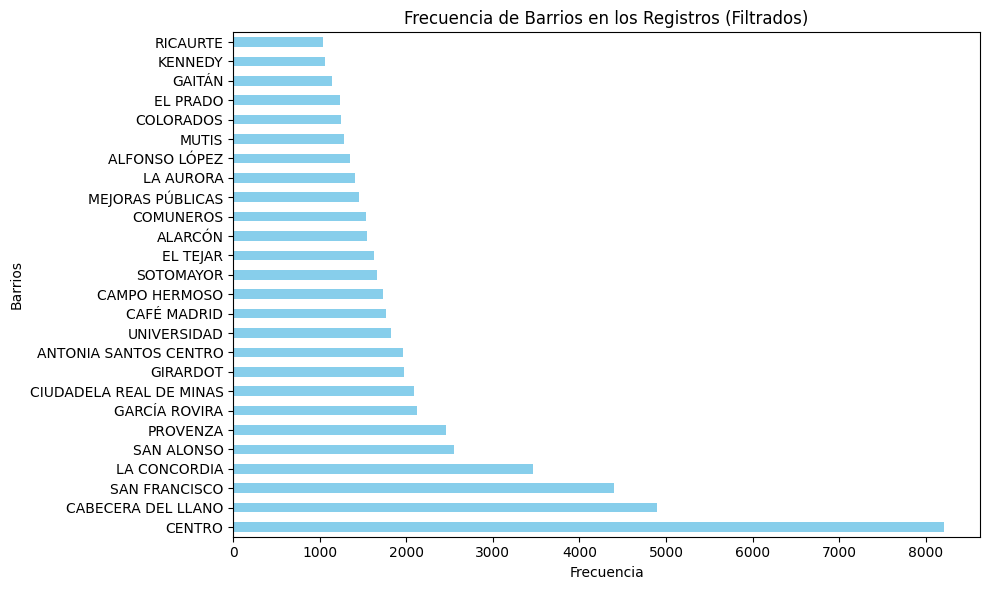

In [ ]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
frecuencias_barrios_filtradas.plot(kind='barh', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Frecuencia de Barrios en los Registros (Filtrados)')  # Título del gráfico
plt.xlabel('Frecuencia')  # Etiqueta del eje x
plt.ylabel('Barrios')  # Etiqueta del eje y
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Muestra el gráfico

In [ ]:
# Agrupa el DataFrame original, df, por la columna 'BARRIOS_HECHO'.
# Luego, cuenta la cantidad de 'DESCRIPCION_CONDUCTA' para cada barrio,
# proporcionando el número de delitos reportados para cada uno.


cantidadbarrio=df.groupby(df["BARRIOS_HECHO"])["DESCRIPCION_CONDUCTA"].count().to_frame()
cantidadbarrio


,DESCRIPCION_CONDUCTA
BARRIOS_HECHO,
10 DE MAYO SANTA BÁRBARA,129
12 DE OCTUBRE,237
13 DE JUNIO,50
20 DE JULIO,25
23 DE JUNIO,81
...,...
VILLAS DE SAN IGNACIO (SECTORES BAVARIA I Y II / BETANIA I Y II / INGESER),431
VIVEROS DE PROVENZA,41
ZONA INDUSTRIAL,7


In [ ]:
df.isnull().sum()


#Muestra la cantidad de datos faltantes por categoria

DESCRIPCION_CONDUCTA       0
ARMAS_MEDIOS               0
BARRIOS_HECHO              0
FECHA_HECHO                0
HORA_HECHO                 0
EDAD                    2188
GENERO                     0
MOVIL_VICTIMA              0
MOVIL_AGRESOR              0
CLASE_SITIO                0
ARTICULO                   0
DELITO_SOLO                0
CURSO_VIDA                 0
CURSO_VIDA_ORDEN           0
AÑO_NUM                    0
MES_NUM                    0
DIA_NUM                    0
RANGO_HORARIO              0
TIPOLOGÍA                  1
RANGO_HORARIO_ORDEN        0
NUM_COM                    0
NOM_COM                    0
CANTIDAD_UNICA             0
DIA_NOMBRE                 0
DIA_NOMBRE_ORDEN           0
Comuna                     0
FECHA_COMPLETA             0
lat                        0
lon                        0
dtype: int64

In [ ]:
#Se cuenta la cantidad sucesos por delito

frecuencias_delito = df['DELITO_SOLO'].value_counts()
frecuencias_delito

HURTO PERSONAS                                                                                     43421
LESIONES PERSONALES                                                                                14376
VIOLENCIA INTRAFAMILIAR                                                                            13585
HURTO ENTIDADES COMERCIALES                                                                         7642
AMENAZAS                                                                                            3970
HURTO MOTOCICLETAS                                                                                  3725
HURTO RESIDENCIAS                                                                                   3646
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                                      2143
ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                 1389
HOMICIDIO                                              

In [ ]:
frecuencias_delito.index

Index(['HURTO PERSONAS', 'LESIONES PERSONALES', 'VIOLENCIA INTRAFAMILIAR',
       'HURTO ENTIDADES COMERCIALES', 'AMENAZAS', 'HURTO MOTOCICLETAS',
       'HURTO RESIDENCIAS', 'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS', 'HOMICIDIO',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS', 'EXTORSIÓN',
       'ACCESO CARNAL VIOLENTO', 'ACTO SEXUAL VIOLENTO',
       'ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR',
       'ACOSO SEXUAL', 'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'HURTO AUTOMOTORES', 'PORNOGRAFÍA CON MENORES',
       'UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'LESIONES CULPOSAS', 'INDUCCIÓN A LA PROSTITUCIÓN', 'FEMINICIDIO',
       'DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA 

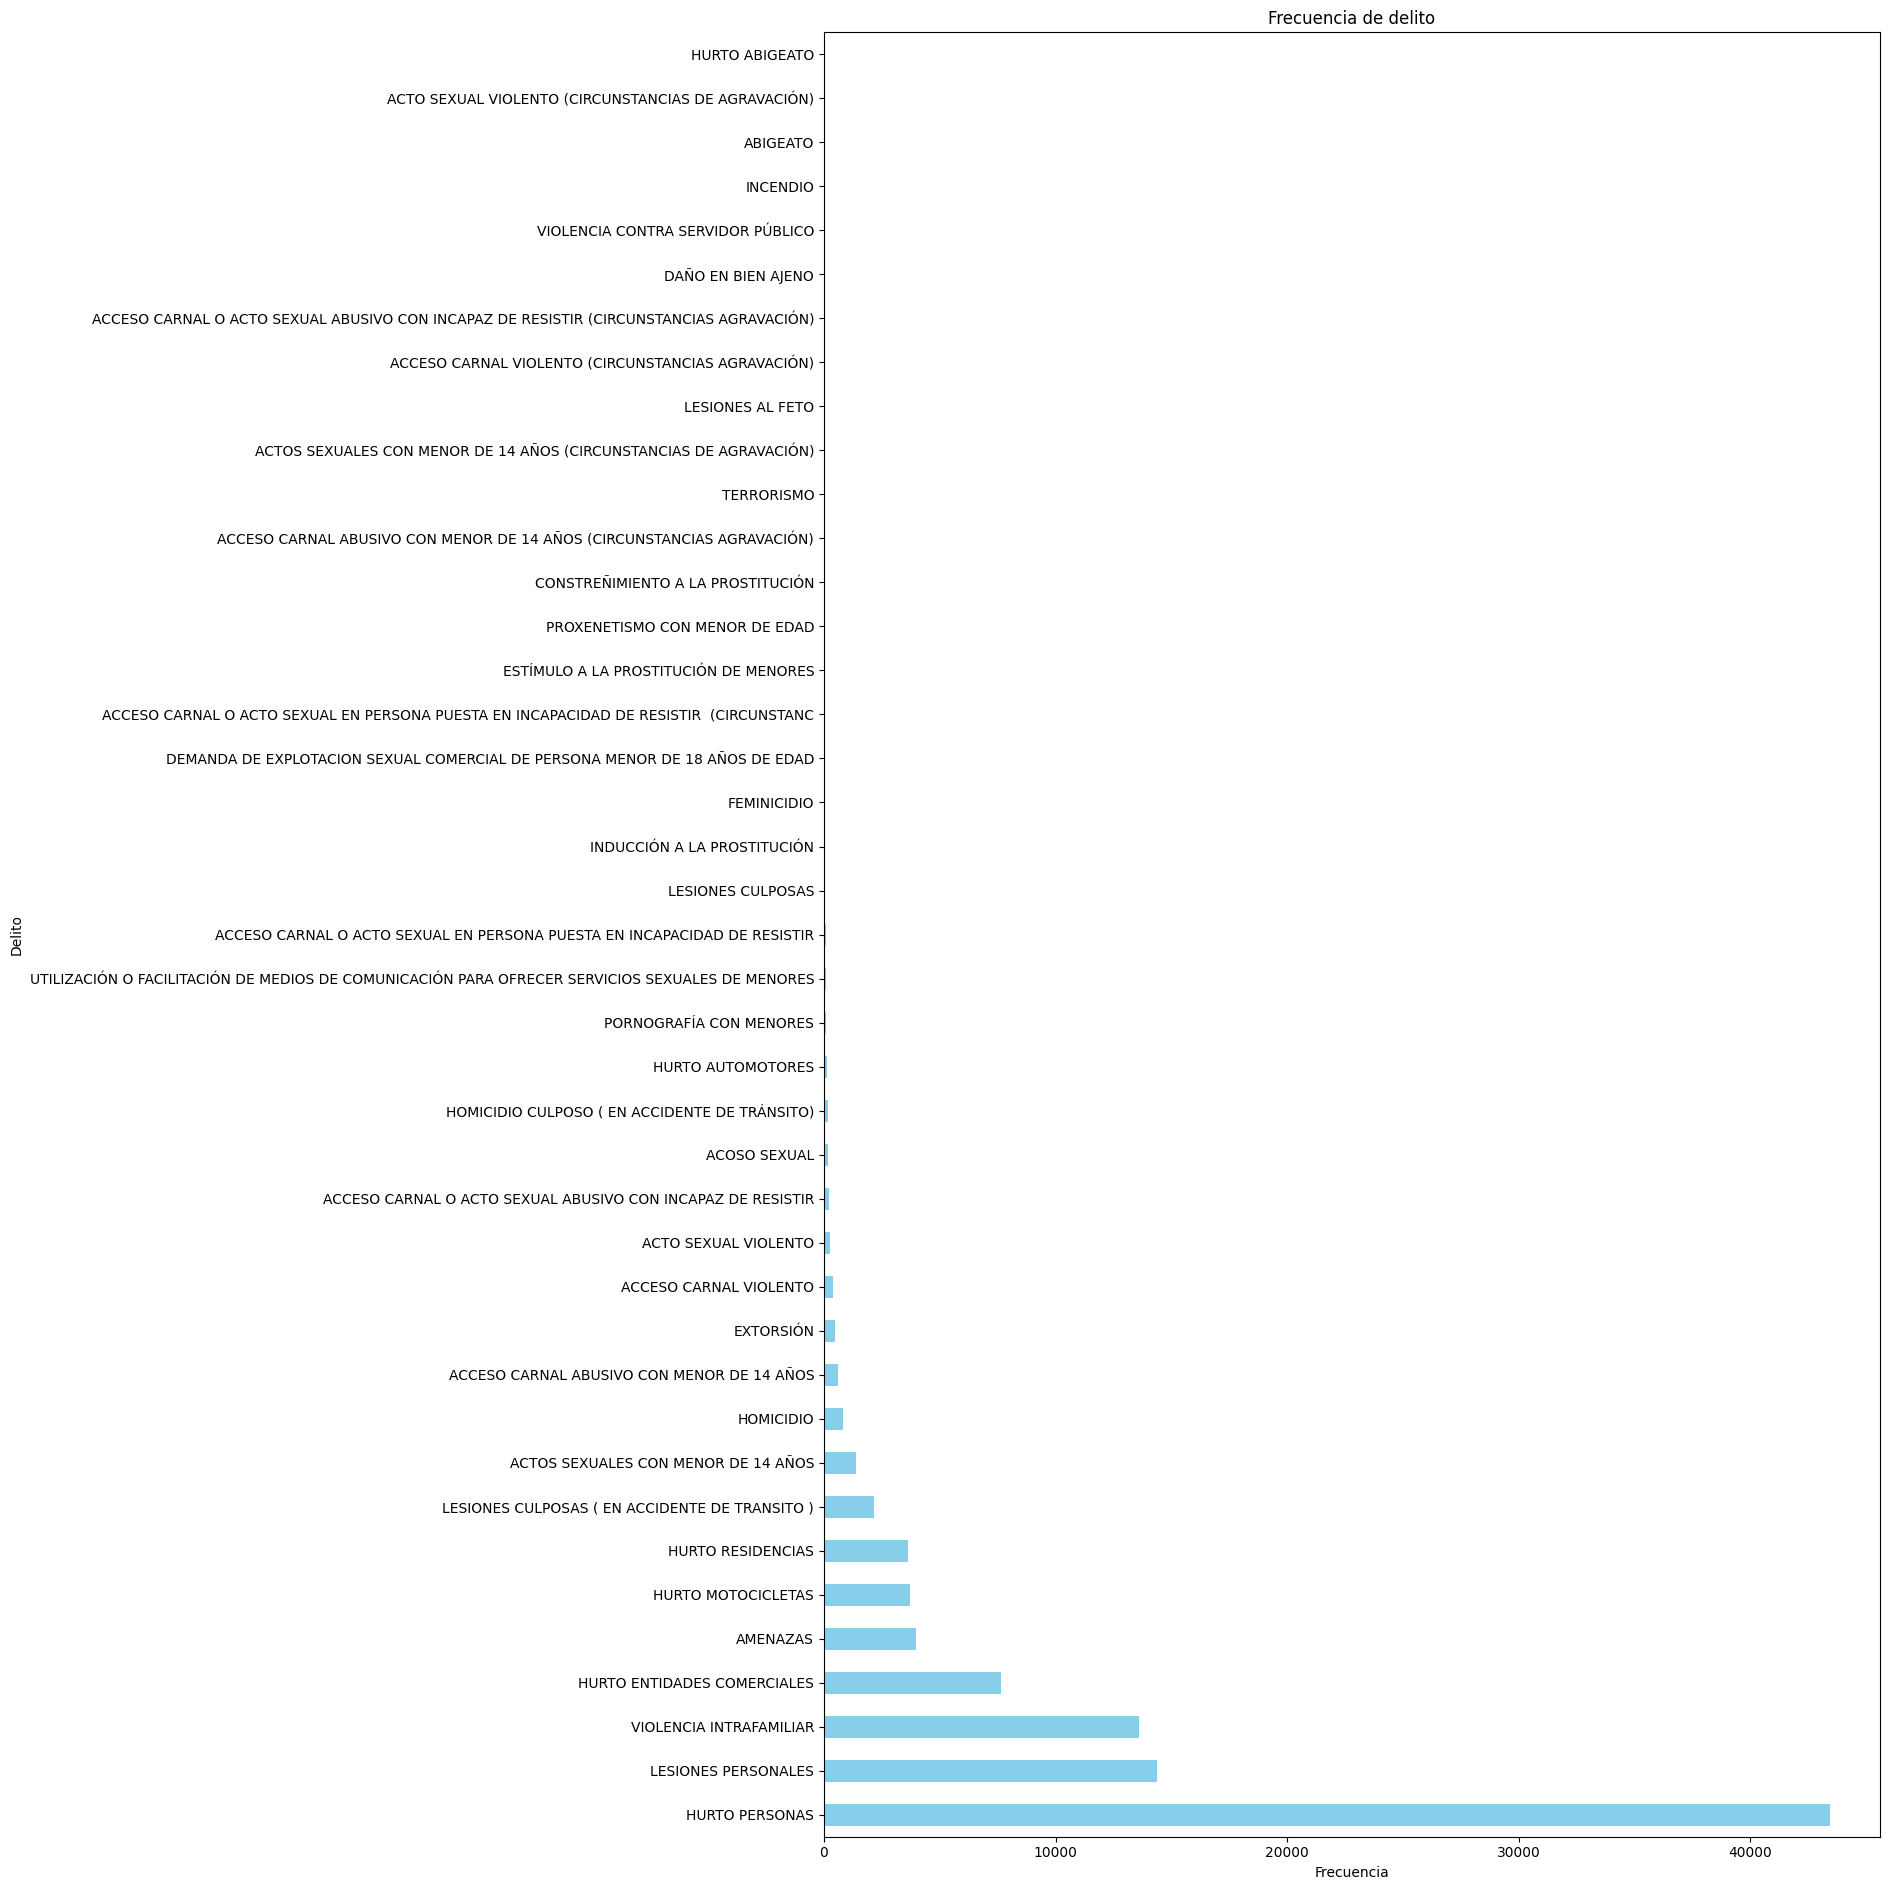

In [ ]:
#Se grafica la frecuencia con la que se repite un delito para poder vizualizarlos mejor y asi poder
#sacar mejores conclusiones

plt.figure(figsize=(19, 19))
frecuencias_delito.plot(kind='barh', color='skyblue')
plt.title('Frecuencia de delito')
plt.xlabel('Frecuencia')
plt.ylabel('Delito')
plt.tight_layout()
plt.show()

#Las conclusiones que se sacas son las siguientes:
#La mayoria de delitos son de hurto personal
#Hay muchos delitos los cuales ocurren tan poco que al momento
#de predecir su probabilidad no van a variar tanto haciendo que no tenga peso

In [ ]:
df.NOM_COM.unique()

array(['SUR', 'PROVENZA', 'LA CIUDADELA', 'LA CONCORDIA', 'CENTRO',
       'CABECERA DEL LLANO', 'ORIENTAL', 'OCCIDENTAL', 'SAN FRANCISCO',
       'NORORIENTAL', 'NORTE', 'SUROCCIDENTE', 'GARCIA ROVIRA',
       'MORRORICO', 'LA PEDREGOSA', 'MUTIS', 'LAGOS DEL CACIQUE'],
      dtype=object)

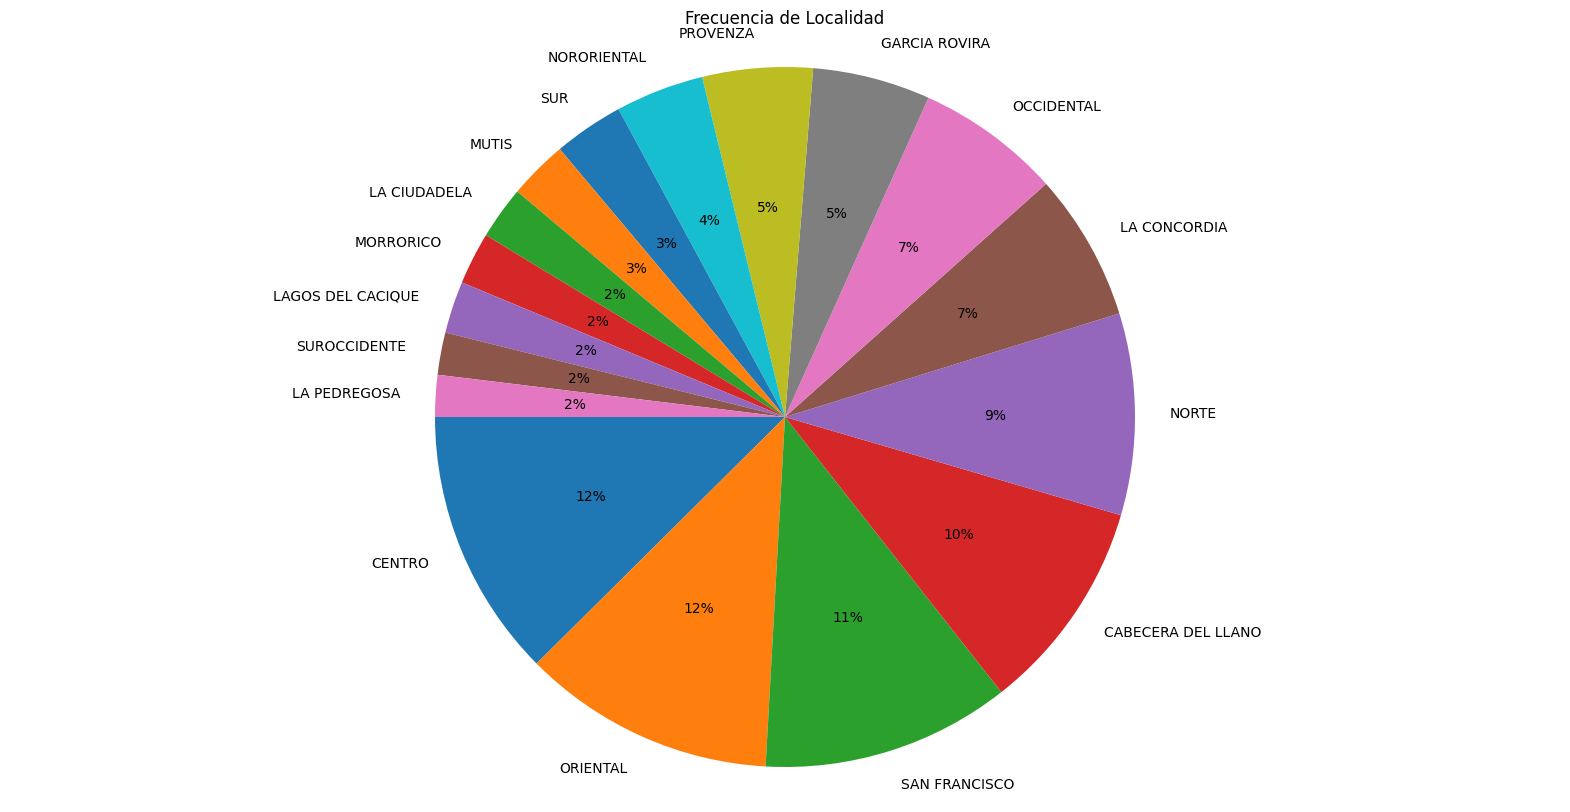

In [ ]:
frecuencias_local = df['NOM_COM'].value_counts()
frecuencias_local
plt.figure(figsize=(20, 10))
plt.pie(frecuencias_local, labels=frecuencias_local.index, autopct='%1.0f%%', startangle=180)
plt.axis('equal')
plt.title('Frecuencia de Localidad')
plt.show()


In [ ]:
frecuencias_genero = df['GENERO'].value_counts()
frecuencias_genero

FEMENINO        44989
MASCULINO       43218
SIN REGISTRO     9362
Name: GENERO, dtype: int64

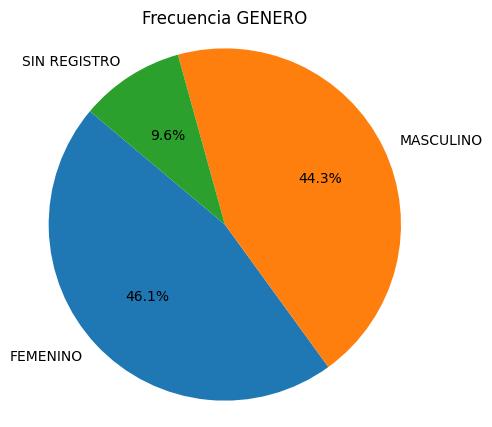

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(frecuencias_genero, labels=frecuencias_genero.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frecuencia GENERO')
plt.show()

In [ ]:
#¿ cuál es la edad más afectada?
frecuencias_edad = df['EDAD'].value_counts()
frecuencias_edad

SIN REGISTRO    7493
30              3042
25              2854
26              2832
28              2828
                ... 
92                11
94                 4
93                 3
95                 2
125                1
Name: EDAD, Length: 98, dtype: int64

In [ ]:

df.EDAD.replace('SIN REGISTRO', np.nan ,inplace=True,regex=True)
#Reemplaza los valores sin registro por valor NAN

In [ ]:
df['EDAD'].fillna(30, inplace=True)
df['EDAD']=df['EDAD'].astype(int)
df.isna().sum()

DESCRIPCION_CONDUCTA    0
ARMAS_MEDIOS            0
BARRIOS_HECHO           0
FECHA_HECHO             0
HORA_HECHO              0
EDAD                    0
GENERO                  0
MOVIL_VICTIMA           0
MOVIL_AGRESOR           0
CLASE_SITIO             0
ARTICULO                0
DELITO_SOLO             0
CURSO_VIDA              0
CURSO_VIDA_ORDEN        0
AÑO_NUM                 0
MES_NUM                 0
DIA_NUM                 0
RANGO_HORARIO           0
TIPOLOGÍA               1
RANGO_HORARIO_ORDEN     0
NUM_COM                 0
NOM_COM                 0
CANTIDAD_UNICA          0
DIA_NOMBRE              0
DIA_NOMBRE_ORDEN        0
Comuna                  0
FECHA_COMPLETA          0
lat                     0
lon                     0
dtype: int64

In [ ]:
# Define los rangos de edades y la lista de etiquetas para el gráfico

bins = [-np.inf, 6, 12, 19, 26,60,np.inf]
names = ['PRIMERA INFANCIA','INFANCIA','ADOLECENCIA','JUVENTUD','ADULTEZ','PERSONA MAYOR']

df['RangoEdad'] = pd.cut(df['EDAD'], bins, labels=names)


In [ ]:
cantidadporrango=df['RangoEdad'].value_counts()

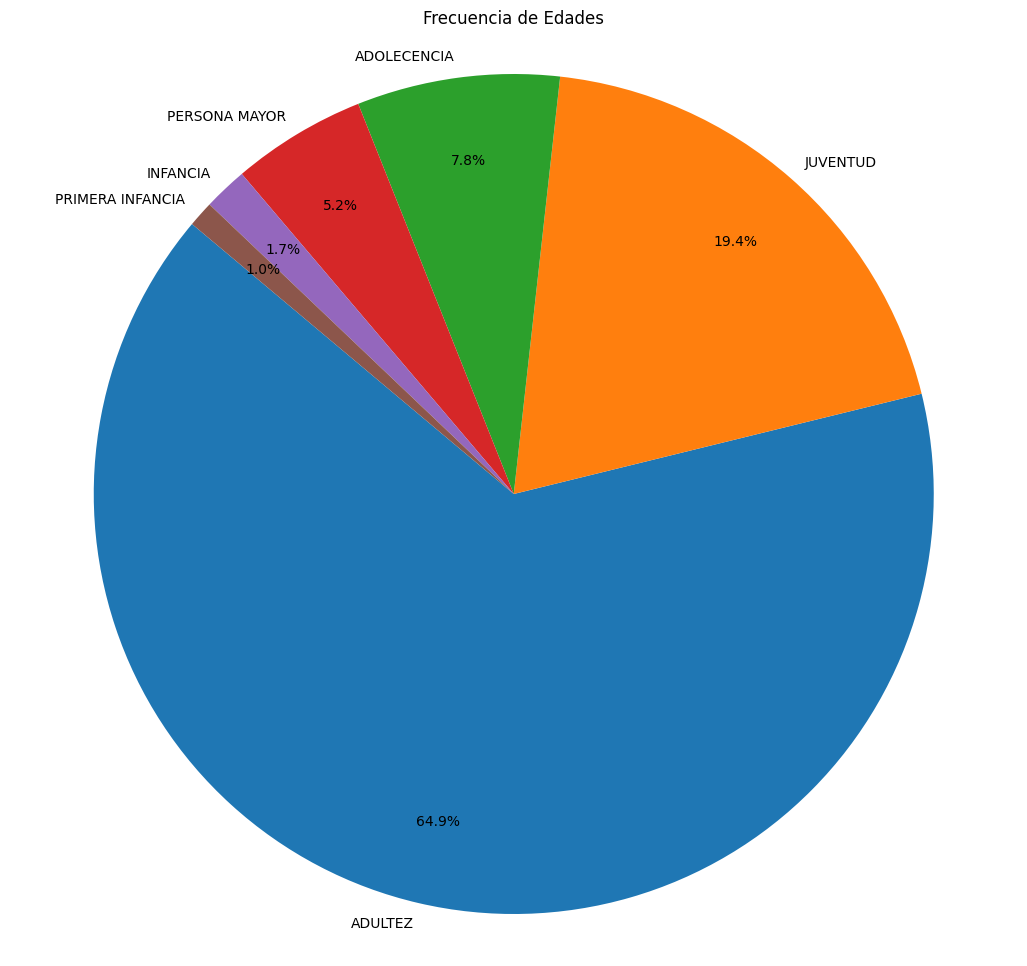

In [ ]:
# Crea el gráfico de pastel utilizando los rango de edades
plt.figure(figsize=(13, 12))
plt.pie(cantidadporrango, labels=cantidadporrango.index, autopct='%1.1f%%', pctdistance=0.8, startangle=140, labeldistance=1.05)
plt.axis('equal')
plt.title('Frecuencia de Edades')
plt.show()

#De este grafico se concluye que entre mas edad se tiene mas problabilidad hay de que sea victima
#de un delito

In [ ]:
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,NUM_COM,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,FECHA_COMPLETA,lat,lon,RangoEdad
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia",17/06/2019 08:30:00 p. m.,7.083413,-73.132530,JUVENTUD
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 11:15:00 p. m.,7.083413,-73.132530,JUVENTUD
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 06:00:00 p. m.,7.083413,-73.132530,JUVENTUD
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia",25/08/2019 03:45:00 p. m.,7.083413,-73.132530,JUVENTUD
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,11,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",27/03/2019 11:00:00 p. m.,7.083413,-73.132530,JUVENTUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,19,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia",17/03/2023 07:22:00 p. m.,7.118130,-73.126312,ADULTEZ
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,19,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia",27/03/2023 05:25:00 p. m.,7.118130,-73.126312,ADULTEZ
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,19,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia",11/03/2023 10:50:00 p. m.,7.118130,-73.126312,ADOLECENCIA
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,19,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia",22/03/2023 08:00:00 a. m.,7.118130,-73.126312,ADULTEZ


In [ ]:
df.EDAD.value_counts()

30     12723
25      2854
26      2832
28      2828
23      2778
       ...  
92        11
94         4
93         3
95         2
125        1
Name: EDAD, Length: 97, dtype: int64

In [ ]:
#¿ cuál es el arma que más utilizan?
frecuencias_armas = df['ARMAS_MEDIOS'].value_counts()
frecuencias_armas

SIN EMPLEO DE ARMAS                   44458
ARMA BLANCA / CORTOPUNZANTE           20456
CONTUNDENTES                          18705
ARMA DE FUEGO                          7184
LLAVE MAESTRA                          1839
PALANCAS                               1419
VEHICULO                               1400
MOTO                                    765
ESCOPOLAMINA                            482
SIN REGISTRO                            256
LLAMADA TELEFONICA                      239
REDES SOCIALES                           82
DIRECTA                                  57
PERRO                                    49
ARMA TRAUMATICA                          38
NO REPORTADO                             17
ACIDO                                    13
ARTEFACTO INCENDIARIO                    13
CARTA EXTORSIVA                          12
MEDICAMENTOS                             12
MIXTA                                    10
AGUA CALIENTE                            10
ARTEFACTO EXPLOSIVO/CARGA DINAMI

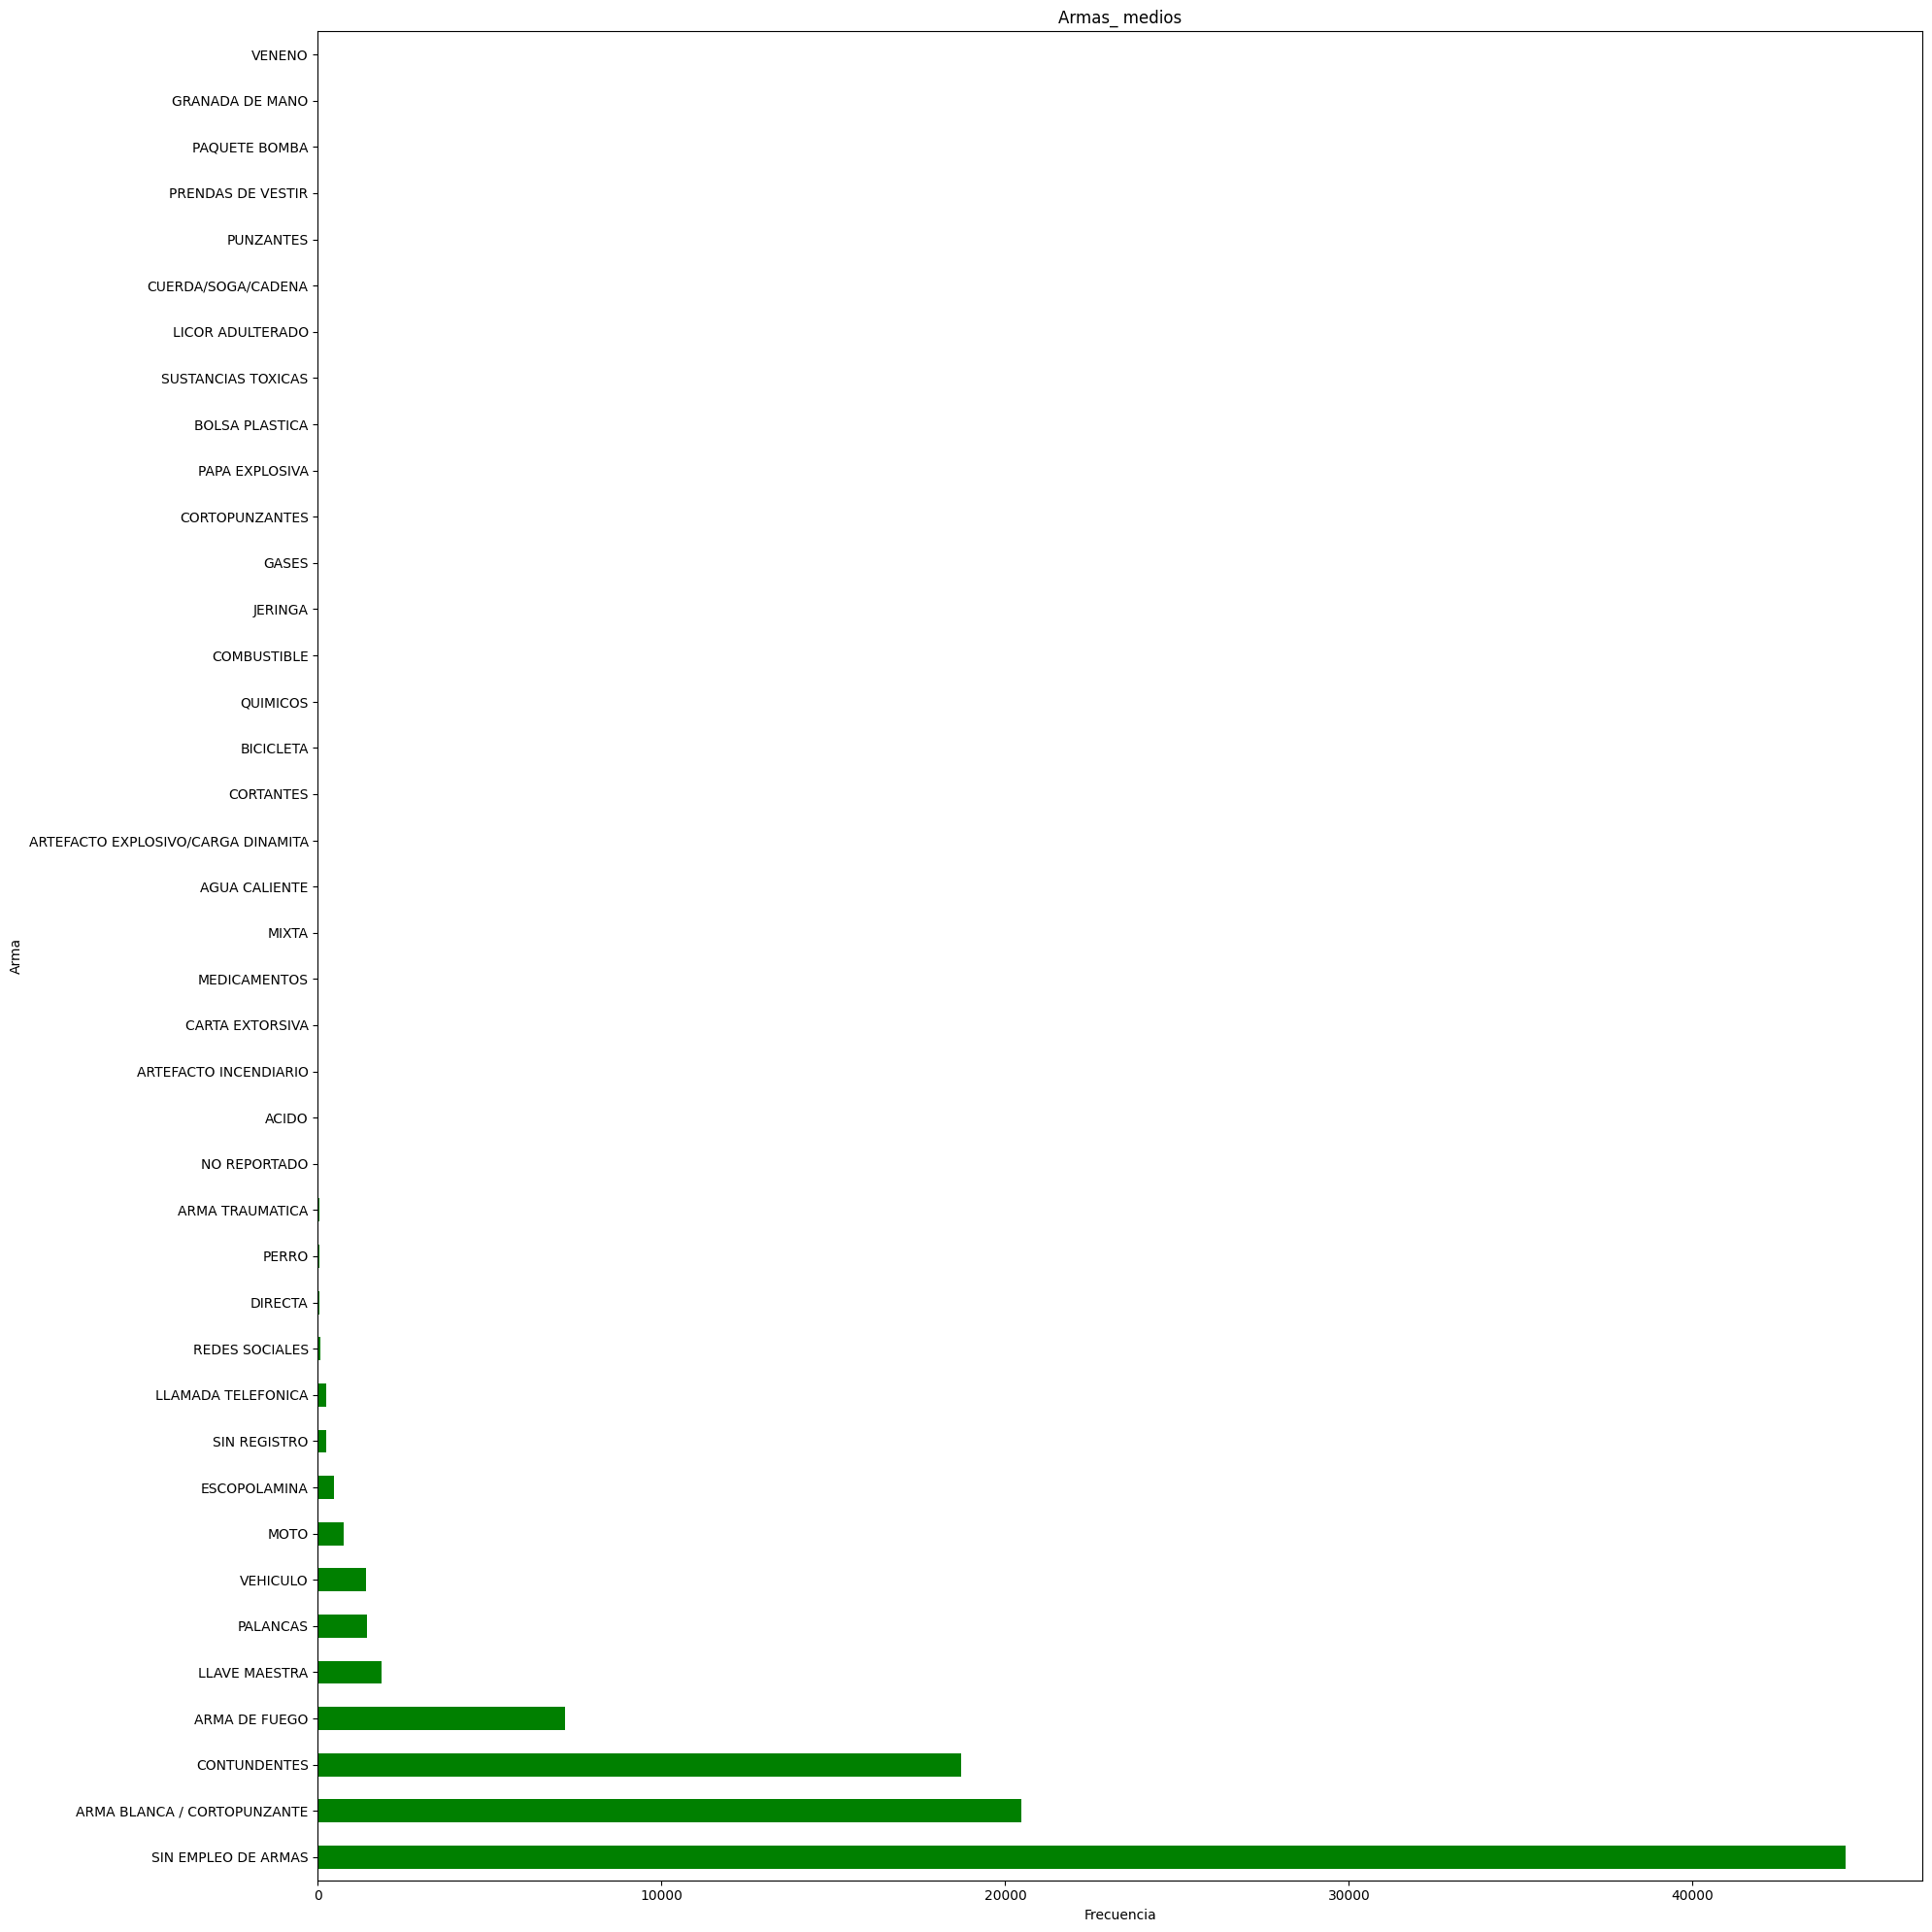

In [ ]:
plt.figure(figsize=(20, 20))
frecuencias_armas.plot(kind='barh', color='green')
plt.title('Armas_ medios')
plt.xlabel('Frecuencia')
plt.ylabel('Arma')
plt.tight_layout()
plt.show()

#Las conclusiones que se sacas son las siguientes:
#La mayoria de delitos se producen sin arma y las armas que mas se utilizan son las armas blancas y las contundentes
#Hay muchas armas o medios que se utilizan tan poco que al momento
#de predecir su probabilidad no van a variar tanto haciendo que no tenga peso

In [ ]:
#movil_victima mas repetido
frecuencias_victima = df['MOVIL_VICTIMA'].value_counts()
frecuencias_victima

A PIE                    84091
CONDUCTOR MOTOCICLETA     5015
CONDUCTOR VEHICULO        3354
PASAJERO BUS              1856
PASAJERO MOTOCICLETA       737
CONDUCTOR TAXI             594
BICICLETA                  578
PASAJERO TAXI              508
PASAJERO VEHICULO          495
CONDUCTOR BUS              204
PASAJERO METRO             121
SIN REGISTRO                12
PASAJERO AERONAVE            3
PASAJERO BARCO               1
Name: MOVIL_VICTIMA, dtype: int64

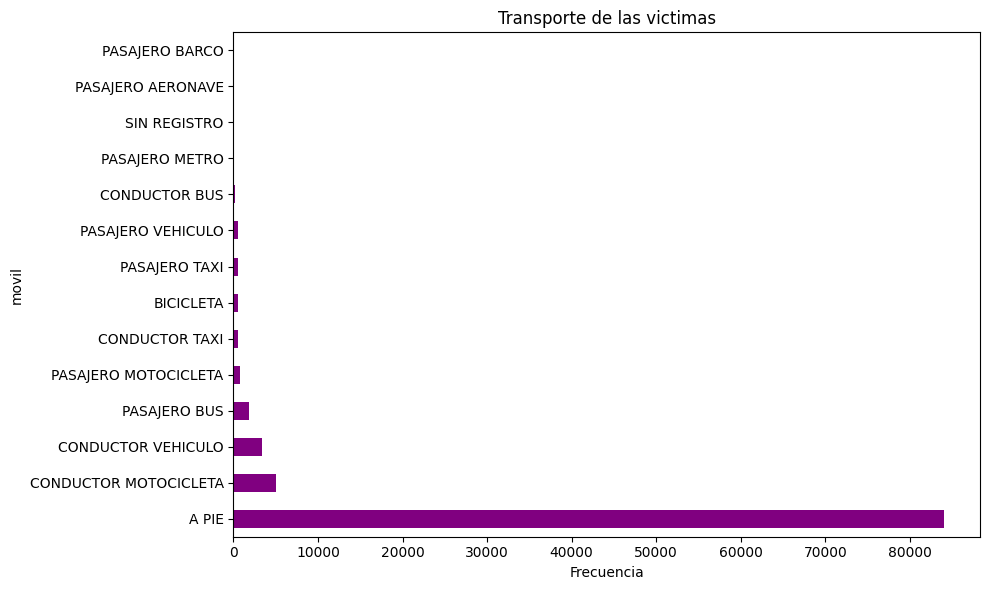

In [ ]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
frecuencias_victima.plot(kind='barh', color='purple')  # Tipo de gráfico y color de las barras
plt.title('Transporte de las victimas')  # Título del gráfico
plt.xlabel('Frecuencia')  # Etiqueta del eje x
plt.ylabel('movil')  # Etiqueta del eje y
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Muestra el gráfico

#De esta grafica se concluye que hay mas probabilidad de ser victima de un delito si se anda a pie
#Ademas de que no existe una gran diferencia entre cuando se va en motocicleta o en un vehiculo

In [ ]:
df.RANGO_HORARIO_ORDEN =df.RANGO_HORARIO_ORDEN.astype(int)
df.dtypes
df.RANGO_HORARIO_ORDEN.value_counts()

10    7124
11    5960
19    5752
8     5490
20    5422
18    5315
9     5216
16    4960
17    4891
15    4871
14    4495
12    4336
21    3953
13    3916
7     3533
0     3411
22    3143
6     2635
23    2483
2     2374
1     2365
3     2249
5     1874
4     1801
Name: RANGO_HORARIO_ORDEN, dtype: int64

In [ ]:
#Se coloca un rango de horario siendo este
#de 0 a 7 madrugada , de 7 a 13 mañana, de 13 a 19 tarde
#y desde las 19 noche

bins = [-np.inf, 7, 13, 19, np.inf]
names = ['MADRUGADA','MAÑANA','TARDE','NOCHE']

df['rangoHORARIO']=pd.cut(df['RANGO_HORARIO_ORDEN'],bins,labels=names)

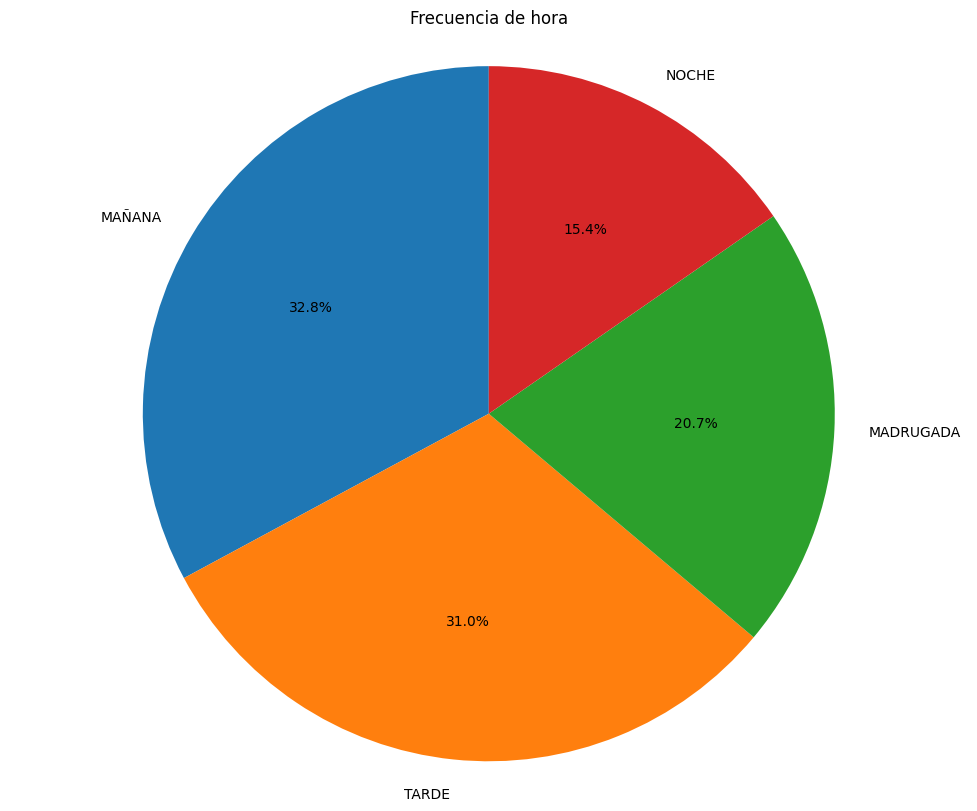

In [ ]:
cantidadporrangohora=df['rangoHORARIO'].value_counts()


# Crea el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(cantidadporrangohora,labels=cantidadporrangohora.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.title('Frecuencia de hora')
plt.show()

#De este grafico se puede concluir que entre la mañana y la tarde ocurren la mayoria de delitos y
#en la noche es cuando ocurren menos delitos

In [ ]:
cantidadporrangohora

MAÑANA       32042
TARDE        30284
MADRUGADA    20242
NOCHE        15001
Name: rangoHORARIO, dtype: int64

In [ ]:
# ¿A QUE HORA HAY MÁS DELITOS? (df['RANGO_HORARIO_ORDEN']
cantidadhora=df['RANGO_HORARIO_ORDEN'].value_counts()
cantidadhora

10    7124
11    5960
19    5752
8     5490
20    5422
18    5315
9     5216
16    4960
17    4891
15    4871
14    4495
12    4336
21    3953
13    3916
7     3533
0     3411
22    3143
6     2635
23    2483
2     2374
1     2365
3     2249
5     1874
4     1801
Name: RANGO_HORARIO_ORDEN, dtype: int64

In [ ]:
df

,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,FECHA_COMPLETA,lat,lon,RangoEdad,rangoHORARIO
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia",17/06/2019 08:30:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 11:15:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 06:00:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia",25/08/2019 03:45:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",27/03/2019 11:00:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia",17/03/2023 07:22:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia",27/03/2023 05:25:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia",11/03/2023 10:50:00 p. m.,7.118130,-73.126312,ADOLECENCIA,NOCHE
97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,CASAS DE HABITACION,...,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia",22/03/2023 08:00:00 a. m.,7.118130,-73.126312,ADULTEZ,MAÑANA


In [ ]:
#se visualiza una tabla para poder ver de forma facil que delitos les ocurre

tabla = pd.pivot_table(data=df, index=['DELITO_SOLO'], columns=['GENERO'], values=['MES_NUM'],aggfunc='count').fillna("")
tabla

MES_NUM            \
GENERO                                             FEMENINO MASCULINO   
DELITO_SOLO                                                             
ABIGEATO                                                          1.0   
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS            474.0     113.0   
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIR...      4.0       1.0   
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ...    181.0      28.0   
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ...      1.0             
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA E...     72.0      11.0   
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA E...      9.0       1.0   
ACCESO CARNAL VIOLENTO                                339.0      41.0   
ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)      2.0             
ACOSO SEXUAL                                          167.0      20.0   
ACTO SEXUAL VIOLENTO                                  213.0      30.0   
ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVAC...                1.0   
ACTOS SEXUALES CON MENOR DE 14 AÑOS                  1167.0     221.0   
ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTAN...      3.0             
AMENAZAS                                             1724.0    2246.0   
CONSTREÑIMIENTO A LA PROSTITUCIÓN                       2.0       3.0   
DAÑO EN BIEN AJENO                                                      
DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERS...     15.0       6.0   
ESTÍMULO A LA PROSTITUCIÓN DE MENORES                   6.0       4.0   
EXTORSIÓN                                             163.0     308.0   
FEMINICIDIO                                            23.0             
HOMICIDIO                                              70.0     738.0   
HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)          23.0     136.0   
HURTO ABIGEATO                                          1.0             
HURTO AUTOMOTORES                                      21.0      63.0   
HURTO ENTIDADES COMERCIALES                                             
HURTO MOTOCICLETAS                                    498.0    1588.0   
HURTO PERSONAS                                      20640.0   22781.0   
HURTO RESIDENCIAS                                    1809.0    1837.0   
INCENDIO                                                                
INDUCCIÓN A LA PROSTITUCIÓN                            30.0       9.0   
LESIONES AL FETO                                        2.0       1.0   
LESIONES CULPOSAS                                      12.0      38.0   
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )        773.0    1370.0   
LESIONES PERSONALES                                  5561.0    8815.0   
PORNOGRAFÍA CON MENORES                                88.0      20.0   
PROXENETISMO CON MENOR DE EDAD                          5.0       1.0   
TERRORISMO                                                              
UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNIC...     77.0      17.0   
VIOLENCIA CONTRA SERVIDOR PÚBLICO                                       
VIOLENCIA INTRAFAMILIAR                             10814.0    2769.0   

                                                                 
GENERO                                             SIN REGISTRO  
DELITO_SOLO                                                      
ABIGEATO                                                         
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS                       
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIR...               
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ...               
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ...               
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA E...               
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA E...               
ACCESO CARNAL VIOLENTO                                           
ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)               
ACOSO SEXUAL                                   

In [ ]:
# Esta línea de código guarda el DataFrame 'df' en un archivo CSV en la ubicación especificada.
# Utiliza el método 'to_csv()' para exportar los datos del DataFrame a un archivo CSV.
# La ruta '/content/drive/MyDrive/Delitos proyecto/Delito Bucaramanga_preprocesar.csv' especifica la ubicación
# y el nombre del archivo CSV en el que se guardarán los datos.
df.to_csv('/content/drive/MyDrive/Delitos proyecto/Delito Bucaramanga_preprocesar.csv')


##CONCLUSIONES

1. Los delitos en Bucaramanga los ultimos años han aumentado, en 2020 hubo una disminución pero se asume a que fue debido a la pandemia y ademas en 2023 se ve que pocos delitos ya que la base de datos de donde sacamos la informacion solo la toma hasta julio.
2. El barrio donde mas hay delitos es en el centro con una gran diferencia de las demas seguido de cabecera del llano.
3. El delito mas usual es el hurto a personas o delitos contra el patrimonio de economico.
4. El genero que mas se ve afectado por los delitos en el femenino, pero aun asi no se genera mucha diferencia entre los masculinos.
5. Con el 58,6% el rango de edades más afectadas es la adultez, entre 27-59 años.
6. El arma más utilizada es la blanca cortopunzante, la mayoria de delitos se cometen a las 12pm de la noche y las victimas normalmente van a pie.
